## Исследование данных о российском кинопрокате

Заказчик  исследования — Министерство культуры Российской Федерации.

Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Рассмотрим фильмы, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.

Данные, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цель исследования** - провести исследовательский анализ

**Ход исследования**

Данные получены из файлов:
- mkrf_movies.csv — данные о прокатных удостоверениях.
- mkrf_shows.csv — данные о прокате в российских кинотеатрах.

Исследование пройдет в 5 этапов:
1. Объединение файлов в один датафрейм
2. Предобработка данных
3. Исследовательский анализ
4. Анализ фильмов с гос. поддержкой
5. Вывод

### Шаг 1. Объединение файлов

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [85]:
data_of_certificate = pd.read_csv('/datasets/mkrf_movies.csv')
data_of_cinema = pd.read_csv('/datasets/mkrf_shows.csv')

In [86]:
display(data_of_certificate.head())
display(data_of_cinema.head())
display(data_of_certificate.info())
display(data_of_cinema.info())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

Соединять будем по столбцу puNumber, но в данных о прокатных удостоверениях этот столбец имеет тип object, а это значит что по мимо цифр там могут быть и буквы, которых явно нет во второй таблице.

In [87]:
for value in range(len(data_of_certificate)):
    if data_of_certificate['puNumber'][value].isdigit() == False:
        print(value,'|', data_of_certificate['puNumber'][value])

804 |  111004112
1797 | нет


In [89]:
display(data_of_certificate[data_of_certificate['puNumber'].str.isnumeric() == False])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
display(data_of_certificate.loc[1797])

title                    Курбан-роман. (История с жертвой)
puNumber                                               нет
show_start_date                   2014-05-15T12:00:00.000Z
type                                        Художественный
film_studio                               ФОНД "ИННОВАЦИЯ"
production_country                                  Россия
director                                           С.Юзеев
producer                                        М.Галицкая
age_restriction            «12+» - для детей старше 12 лет
refundable_support                                     NaN
nonrefundable_support                                  NaN
budget                                                 NaN
financing_source                                       NaN
ratings                                                NaN
genres                                                 NaN
Name: 1797, dtype: object

In [91]:
data_of_certificate['puNumber'][1797] = -1
data_of_certificate['puNumber'] = data_of_certificate['puNumber'].astype('int')

Объединим таблицы

In [92]:
main_df = data_of_certificate.merge(data_of_cinema, on='puNumber', how='outer')

In [93]:
display(main_df.head())
display(main_df.info())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


None

In [94]:
display(main_df[main_df['production_country'].isna() == True].head())# явно Россея

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [95]:
#print('\n',main_df['age_restriction'].unique())
print('\n',main_df['type'].unique())
#print('\n',main_df['production_country'].unique())
print('\n',main_df['ratings'].unique())
#print('\n',main_df['genres'].unique())


 ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']

 ['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1']


- есть пропуски в столбцах.(по факту есть возможность и смысл заполнять только production_country)
- столбец ratings - рейтинги в разных форматах.
- столбец type, production_country неявные дубликаты.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типа данных

In [96]:
main_df['show_start_date'] = pd.to_datetime(main_df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [97]:
display(main_df.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [98]:
main_df_copy = main_df.copy()

In [99]:
print('\n',main_df['ratings'].unique())
main_df['ratings'] = main_df['ratings'].str.replace('%', '')
main_df['ratings'] = main_df['ratings'].astype('float')
for value in range(len(main_df)):
    if main_df['ratings'][value] > 10:
        main_df['ratings'][value] /= 10

#main_df['ratings'] = np.where(main_df['ratings'].str.contains('%',na=False), main_df['ratings'].str.strip('%').astype('float') / 10, ...)


 ['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1']


In [100]:
s1 = pd.Series(np.where(main_df_copy['ratings'].str.contains('%',na=False), 
                               main_df_copy['ratings'].str.strip('%').astype('float') / 10, 
                               main_df_copy['ratings'])).astype('float')


# Проверим, что получилось то же самое
display((s1[lambda x : x.notna()] == main_df[main_df['ratings'].notna()]['ratings']).all())


True

In [101]:
print('\n',main_df['ratings'].unique())


 [7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 9.9 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2
 4.7 4.9 3.9 2.7 3.3 2.9 2.8 3.7 1.4 3.1 9.7 3.5 3.2 1.5 2.1 2.5 9.2 3.4
 1.1 3.6 9.1 9.4 9.  1.9 1.  8.9 1.3 1.8 1.2 1.7 9.8]


#### Шаг 2.2. Изучение пропусков в датафрейме

In [102]:
main_df['production_country'] = main_df['production_country'].fillna('Россия')

Единственный адекватный пропуск который можно заполнить, и то пришлось искать информацию и пробить студию (ералаш выпусклся и в ссср, но студия зарегана с 2004 предположим что это были новые выпуски). Остальные пропуски чем то вразумительным не заполнить, сборы заполнять медианой или среднем нельзя(как минимум потому что пропусков половина от данных, как максимум из за специфики данных). Рейтинг заполнять никак, это только исказит анализ. В целом остальные пропуски категориальные, их можно заполнить чем то вроде "нет данных", но смысла в этом нет(по крайней мере, я не вижу для нашего исследования).

пс. ну или руками пробивать каждую позицию на википедии, но это канешно слишком сильный ход

#### Шаг 2.3. Изучение дубликатов в датафрейме

In [103]:
main_df['type'] = main_df['type'].str.lower()
main_df['type'] = main_df['type'].str.replace(' ', '')
print('\n',main_df['type'].unique())

main_df['production_country'] = main_df['production_country'].str.lower()
main_df['production_country'] = main_df['production_country'].str.replace(' ', '')
print('\n',main_df['production_country'].unique())


 ['художественный' 'анимационный' 'прочие' 'документальный'
 'научно-популярный' 'музыкально-развлекательный']

 ['сша' 'ссср' 'франция' 'ссср,венгрия' 'германия-великобритания'
 'великобритания-италия' 'чехословакия' 'сша-франция-турция'
 'новаязеландия' 'канада-франция-испания' 'сша-германия'
 'сша-великобритания' 'великобритания' 'франция-мексика-сша'
 'россия,казахстан,сша' 'ссср,швеция' 'ссср,франция,англия,куба,гдр'
 'германия' 'великобритания-сша-германия-кнр'
 'ссср,чсср,западныйберлин,пнр' 'ссср,италия' 'гонконг,кнр' 'сша-франция'
 'сша-япония-франция-великобритания'
 'гонконг-сингапур-таиланд-великобритания' 'сша-канада'
 'франция-италия-великобритания-сша' 'франция-сша'
 'ирландия-великобритания-германия' 'чехия' 'сша-австралия'
 'ссср,финляндия' 'сша-франция-великобритания-австрия' 'сша-бельгия'
 'сша-ирландия-великобритания' 'великобритания-сша'
 'люксембург-нидерланды-испания-великобритания-сша-италия'
 'великобритания-франция-сша' 'новаязеландия-сша'
 'сша-великобритани

In [104]:
#print(len(main_df) - len(main_df.drop_duplicates()))# проверяем количество явных дубликатов
print(main_df.duplicated().sum())

0


Явных дубликатов не обнаруженно.

#### Шаг 2.4. Проверка количественных значений

In [105]:
display(main_df[main_df['budget'].isna() == False].describe().T)

,count,mean,std,min,25%,50%,75%,max
puNumber,332.0,1.115938e+08,5.703031e+06,111000115.0,111004891.5,1.110104e+08,1.110178e+08,2.140101e+08
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.0,0.000000e+00,1.500000e+07,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,25000000.0,3.000000e+07,4.037500e+07,4.000000e+08
budget,332.0,1.272297e+08,1.885883e+08,0.0,42000000.0,6.864992e+07,1.419853e+08,2.305074e+09
ratings,316.0,6.020886e+00,1.148943e+00,1.0,5.3,6.200000e+00,6.700000e+00,9.400000e+00
box_office,318.0,1.324324e+08,3.348379e+08,1550.0,1236675.5,1.572007e+07,1.063730e+08,3.073569e+09


столбцы budget, refundable_support, nonrefundable_support, financing_source которые могу нас заинтересовать. Разумеется они почти все бьются в одно число потому что эти данные связанны с отечественными лентами и господдержкой.

In [106]:
display(main_df[main_df['budget'] == 0])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ООО Киностудия ""Сентябрь""",россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,художественный,"ООО ""КиноФирма""",россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


У бюджета есть 0, что является ошибкой, заполнять суммой возвратных/невозвратных средств будет не корректно, но 0 немного просто удалим их.

In [107]:
main_df = main_df[main_df['budget'] != 0].reset_index(drop=True)

In [108]:
display(main_df[main_df['box_office'] == 0])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,художественный,"совместное производство Киностудия ""Мосфильм"",...","ссср,франция,англия,куба,гдр",Эмиль Лотяну,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,Н.Губенко,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,художественный,"ООО ""Студия РИМ""",россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",германия-нидерланды-беларусь-россия-латвия,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"аниме,мультфильм,драма",0.0
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.7,"аниме,мультфильм,фантастика",0.0
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,биография,0.0
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,художественный,"ООО ""Синема Арт Студио""",россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"комедия,мелодрама",0.0
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,художественный,Депф оф Филд,сша,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"мелодрама,комедия,драма",0.0
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",германия-бельгия-сша-франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.9,драма,0.0


In [109]:
main_df = main_df[main_df['box_office'] != 0].reset_index(drop=True)

Та же ситуация со сборами.

In [110]:
main_df = main_df[main_df['puNumber'] > 0].reset_index(drop=True)
display(main_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
puNumber,7444.0,1.353105e+08,3.842571e+07,1811096.0,113000292.5,121015614.5,1.240034e+08,2.310011e+08
refundable_support,315.0,1.160317e+07,2.515144e+07,0.0,0.0,0.0,1.000000e+07,1.800000e+08
nonrefundable_support,315.0,4.810704e+07,5.988614e+07,0.0,25000000.0,30000000.0,4.000000e+07,4.000000e+08
budget,315.0,1.340961e+08,1.912260e+08,14462464.0,46153866.5,73379554.0,1.500043e+08,2.305074e+09
ratings,6483.0,6.488987e+00,1.114140e+00,1.0,5.9,6.6,7.200000e+00,9.900000e+00
box_office,3117.0,7.659493e+07,2.410807e+08,40.0,96846.0,2351960.0,2.376625e+07,3.073569e+09


In [111]:
display(main_df.sort_values(['box_office']).head(50))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
150,Жестокий романс,111006013,2013-10-18 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,Э.Рязанов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.1,"драма,мелодрама,история",40.0
2254,Каменный цветок.,111016714,2014-12-01 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,А.Птушко,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"фэнтези,драма,мелодрама",50.0
3883,22 пули: Бессмертный,121006410,2010-04-01 12:00:00+00:00,художественный,Еуроп Корпорейшн,франция,Ришар Бери,"Люк Бессон, Дидье Хорау, Пьер-Анж Ле Погам",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"боевик,драма,криминал",75.0
1172,Астерикс и Обеликс в Британии 3D,121025012,2012-10-05 12:00:00+00:00,художественный,"Уайлд Банч, Фиделите Фильм, Филм Кайрос, Синет...",франция-италия-испания-венгрия,Лоран Тирар,"Оливье Делбоск, Марк Миссонье",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.6,"комедия,приключения,семейный",80.0
163,За спичками,111006113,2013-10-18 12:00:00+00:00,художественный,"Киностудия ""Мосфильм"", ""СУОМИ-ФИЛЬМ""","ссср,финляндия","Л.Гайдай, Р.Орко",NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.5,"комедия,приключения,история",100.0
210,Одиноким предоставляется общежитие,111018614,2014-12-01 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,С.Самсонов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",100.0
1490,Лучшие дни впереди,121023413,2013-09-03 12:00:00+00:00,художественный,"Ле Фильм дю Киоск, 27.11 Продюксьон, Директ си...",франция,Марион Верну,"Франсуа Краус, Дени Пино-Валенсьенн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"драма,комедия",100.0
4028,Ловец ветра,111009310,2010-10-21 12:00:00+00:00,художественный,"ГУП РБ Киностудия ""Башкортостан""",россия,А.Юмагулов,А.Юнусов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"драма,комедия",100.0
1261,Обещание /По произведению Стефана Цвейга/,121009914,2014-05-19 12:00:00+00:00,художественный,"Фиделите Фильм, Уалд Банч, Скоуп Пикчерз, Оран...",франция-бельгия,Патрис Леконт,"Оливье Дебоск, Кристин де Жекель, Марк Миссонье",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.1,"боевик,драма,приключения",100.0
349,Волшебное приключение,124000905,2015-01-18 12:00:00+00:00,анимационный,"Экшион Филмз, Патэ Синема, Болексбразерс",великобритания-франция,Дэйв Бортвик,"Клауди Горский, Энди Лэйтон, Лаурен Родон, Пас...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.7,"мультфильм,фэнтези,комедия",100.0


In [112]:
us_low = main_df['box_office'].describe()[4] - 1.5*(main_df['box_office'].describe()[6]-main_df['box_office'].describe()[4])
print(us_low)

-35407264.349999994


Много аномально маленьких сборов по бокс плоту их не отрезать (хотя даже если можно было бы, не уверен что это корректно). Думаю стоит для анализа со сборами использовать данные от медианы и выше.

#### Шаг 2.5. Добавление новых столбцов

In [113]:
main_df['year'] = main_df['show_start_date'].dt.year

In [115]:
def get_first(cell_value):
    try:
        return cell_value.split(',')[0]
    except:
        return np.nan

main_df['main_director'] = main_df['director'].apply(get_first)
main_df['main_genres'] = main_df['genres'].apply(get_first)
display(main_df.head(20))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",ссср,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",сша,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,художественный,"Пульсар Продюксьон, ТФ1 Фильм",франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","ссср,венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама


- доля государственной поддержки.

In [116]:
budget_proportion = main_df[main_df['budget'].isna() == False]
budget_proportion['support_proportion'] = (budget_proportion['refundable_support']+budget_proportion['nonrefundable_support'])/budget_proportion['budget']
display(budget_proportion[['title','support_proportion']])

,title,support_proportion
1273,Пока еще жива,0.333703
1439,Бесславные придурки,0.700000
1489,Невидимки,0.612691
1515,БЕРЦЫ,0.690095
1780,Братья Ч,0.624764
...,...,...
7422,Союз спасения,0.510204
7424,Иван Царевич и Серый Волк 4,0.526316
7432,Вторжение,0.529661
7434,Я свободен,0.649998


### Шаг 3. Исследовательский анализ данных

Количество фильмов выпущенных в год


year
2010    981
2011    622
2012    588
2013    625
2014    799
2015    696
2016    814
2017    503
2018    887
2019    929
Name: title, dtype: int64

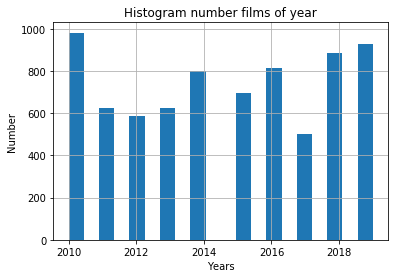

In [117]:
main_df.hist('year', bins = 20)
plt.title('Histogram number films of year')
plt.xlabel('Years')
plt.ylabel('Number')

print('Количество фильмов выпущенных в год')
display(main_df.groupby('year')['title'].count())

In [118]:
print('Доля фильмов с указанной информацией о прокате:',main_df['box_office'].count()/main_df['year'].count())

Доля фильмов с указанной информацией о прокате: 0.418726491133799


,box_office,year,proportion
year,,,
2010,101,981,0.102956
2011,109,622,0.175241
2012,123,588,0.209184
2013,179,625,0.286400
2014,272,799,0.340426
2015,456,696,0.655172
2016,522,814,0.641278
2017,355,503,0.705765
2018,471,887,0.531003


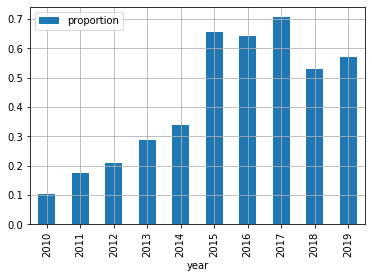

In [119]:
b_o_proportion_df = main_df.groupby('year')[['box_office','year']].count()
b_o_proportion_df['proportion'] = b_o_proportion_df['box_office']/b_o_proportion_df['year']
display(b_o_proportion_df)
b_o_proportion_df.plot(y = 'proportion', kind = 'bar', grid = True)

учитывая что скорее всего в районе половины сборов некорректные, можно преблизительно поделить ответ на два.

year
2010    2.428654e+06
2011    1.410276e+07
2012    6.955423e+06
2013    2.979971e+07
2014    7.434718e+09
2015    3.852783e+10
2016    4.674232e+10
2017    4.845815e+10
2018    4.925199e+10
2019    4.827810e+10
Name: box_office, dtype: float64


Text(0, 0.5, 'Summ_box_office')

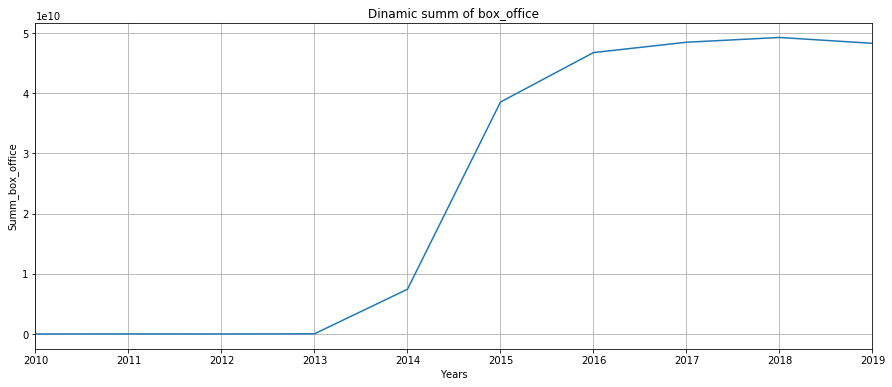

In [120]:
films_dinamics = main_df[main_df['box_office'].isna() == False]
films_dinamics = films_dinamics.groupby('year')['box_office'].sum()
print(films_dinamics)
films_dinamics.plot(figsize=(15,6), grid=True)
plt.title('Dinamic summ of box_office')
plt.xlabel('Years')
plt.ylabel('Summ_box_office')

Минимум 2010, максимум 2018, по граффику видна зависимость того что все провалы по сборам относятся к годам проката 2010-2013, возможно включая 2014-2015. В среднем стоимость фильмов растет, инфляция шо поделать.

In [121]:
mean_median_box = main_df[main_df['box_office'].isna() == False]
display(mean_median_box.groupby('year')['box_office'].median())

year
2010       1710.00
2011       3000.00
2012       6220.00
2013       3580.00
2014      20310.00
2015    4864744.05
2016    3777202.68
2017    9919415.00
2018    8751895.75
2019    4601033.60
Name: box_office, dtype: float64

In [122]:
display(mean_median_box.groupby('year')['box_office'].mean())

year
2010    2.404608e+04
2011    1.293832e+05
2012    5.654815e+04
2013    1.664788e+05
2014    2.733352e+07
2015    8.449085e+07
2016    8.954467e+07
2017    1.365018e+08
2018    1.045690e+08
2019    9.126295e+07
Name: box_office, dtype: float64

In [123]:
age_df=main_df[main_df['year']>2014]
age_df=age_df.pivot_table(index = 'year', columns = 'age_restriction', values = 'box_office', aggfunc = 'sum')
display(age_df)

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,3.790546e+08,1.341951e+10,1.078160e+10,5.430351e+09,8.517312e+09
2016,1.502288e+08,1.115076e+10,1.659425e+10,6.793930e+09,1.205315e+10
2017,2.295989e+08,7.851428e+09,1.869459e+10,9.651496e+09,1.203103e+10
2018,3.244900e+07,1.426729e+10,1.627841e+10,8.760086e+09,9.913759e+09
2019,1.774607e+07,1.268020e+10,1.275342e+10,1.012180e+10,1.270494e+10


Text(0, 0.5, 'Summ_box_office')

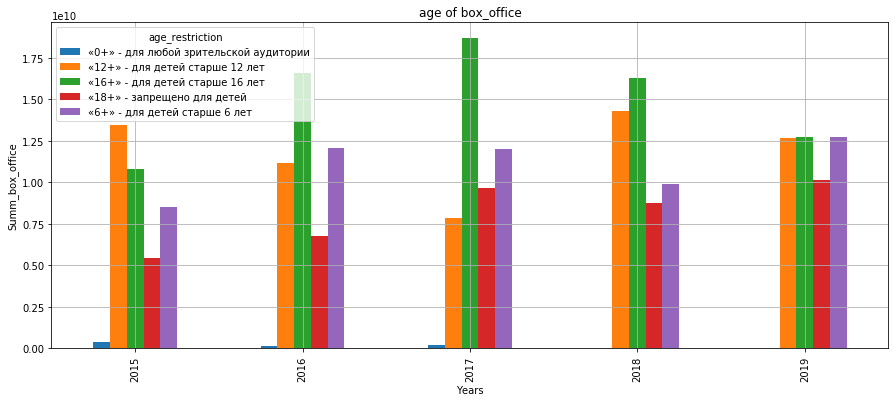

In [124]:
age_df.plot(figsize=(15,6), kind='bar', grid=True)
plt.title('age of box_office')
plt.xlabel('Years')
plt.ylabel('Summ_box_office')

Самые прибыльные картины 16+. Самые не прибльные 0+. 

12+,6+,18+ на протяжении лет становятсе более или менее популярнее дург друга, думаю это должно быть связано с выходом очень кассово успешных картин в тот или иной год с определенным рейтингом.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [125]:
budget_proportion['general_support'] = budget_proportion['refundable_support']+budget_proportion['nonrefundable_support']
budget_proportion['payback'] = budget_proportion['box_office']-budget_proportion['budget']
display(budget_proportion.describe())
#display(budget_proportion[['refundable_support','nonrefundable_support','general_support']])

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year,support_proportion,general_support,payback
count,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,300.000000,3.010000e+02,315.000000,315.000000,3.150000e+02,3.010000e+02
mean,1.115683e+08,1.160317e+07,4.810704e+07,1.340961e+08,6.036667,1.306983e+08,2016.742857,0.517386,5.971022e+07,-4.139510e+06
std,5.844829e+06,2.515144e+07,5.988614e+07,1.912260e+08,1.159167,3.391903e+08,1.647398,0.170043,7.308521e+07,3.204259e+08
min,1.110001e+08,0.000000e+00,0.000000e+00,1.446246e+07,1.000000,1.550000e+03,2013.000000,0.044043,3.000000e+06,-1.971477e+09
25%,1.110048e+08,0.000000e+00,2.500000e+07,4.615387e+07,5.400000,1.067649e+06,2015.000000,0.373458,2.525000e+07,-7.332212e+07
50%,1.110102e+08,0.000000e+00,3.000000e+07,7.337955e+07,6.200000,1.274840e+07,2017.000000,0.592265,3.500000e+07,-4.336374e+07
75%,1.110172e+08,1.000000e+07,4.000000e+07,1.500043e+08,6.700000,1.031348e+08,2018.000000,0.656931,6.000000e+07,-1.477910e+07
max,2.140101e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.400000,3.073569e+09,2019.000000,0.784745,5.000000e+08,2.913569e+09


Средний рейтинг кинолент с поддержкой относительно не высок от 5.4 до 6.7 баллов.

В среднем из бюджета выделяется от 25млн до 60млн.

Фильмы с гос поддержкой более чем в 75% случаях уходят в убыток (а казалось бы).

### Шаг 5. Вывод

В данных много пропусков, данные о прокате есть только в 40%, но половина из них некорректна.

Больше всего вышло фильмов в 2010 году - 981, меньше всего в 2017 - 503 (некорректные данные выпадают на отрезок 2010-2014).

Самый прибыльный по кассовым сбором год 2018, самы менее прибыльный 2010 (но учитывая проблемы данных лучше отбросить начальные года и тогда минимум будет в 2015).

Медиана сборов 2017 года больше чем в 2018, скорее всего в 2018 вышела одна или несколько очень прибыльных картин.

Самые прибыльные картины 16+. Самые не прибльные 0+. Остальные в среднем похожи.

Картины с гос. поддержкой имеют средние рейтинги (учитывая специфику кинопоиска, можно сказать низкие), на их поддержку выделяется в среднем от 25 до 60 млн, и в большинстве случаев, они терпят фиаско в прокате. 

В итоге кино с гос. поддержкой проваливается по оценкам зрителей, и проваливается в прокате, возможно стоит выделять деньги на кино реже(если конечно только все эти фильмы не имеют высокой культурной ценности, в что вериться с трудом).